## Практическая работа №5

In [126]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os

Перед тем, как подавать фотографии на вход нейронной сети, их необходимо привести к одному размеру вида (ширина, высота). Для ширины и высоты в нашем случае были выбраны значения по 250 соответствено.

In [127]:
directory = 'C:/Users/bulen/Desktop/dataset/'
classes = ["milonov", "poperechniy"]

all_images = []
image_size = 250

for name in classes:
    current_path = os.path.join(directory, name)
    class_number = classes.index(name)
    for image in os.listdir(current_path):
        current_image = cv2.imread(os.path.join(current_path, image))
        current_image = cv2.cvtColor(current_image, cv2.COLOR_BGR2RGB)
        current_image = cv2.resize(current_image, (image_size, image_size), interpolation = cv2.INTER_AREA)
        all_images.append([current_image, class_number])

In [129]:
random.shuffle(all_images)

X_images = []
Y_images = []
for features, label in all_images:
    X_images.append(features)
    Y_images.append(label)
X_images = np.array(X_images)
Y_images = np.array(Y_images)

In [130]:
X_images = X_images.reshape(-1, image_size, image_size, 3)
X_images = X_images / 255
print("Shape of X_images:", X_images.shape)

Shape of X_images: (499, 250, 250, 3)


In [131]:
from keras.utils import to_categorical
Y_images = to_categorical(Y_images, num_classes = 2)

В силу малого количества фотографий было решено выделить на обучающую выборку 90% от общего числа фотографий, соответственно на тестирование - 10% 

In [132]:
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_images, Y_images, test_size = 0.10, random_state = 42)
print("Shape of X_train:", X_train.shape, "and shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape, "and shape of Y_test:", Y_test.shape)

Shape of X_train: (449, 250, 250, 3) and shape of X_test: (50, 250, 250, 3)
Shape of Y_train: (449, 2) and shape of Y_test: (50, 2)


In [133]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (4, 4), padding = "Same", activation = "relu", input_shape = (250, 250, 3)))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 16, kernel_size = (4, 4), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(6, activation = "relu"))
model.add(Dense(2, activation = "softmax"))

In [134]:
optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer = optimizer,
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])

epochs = 10
batch_size = 32

In [135]:
model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, steps_per_epoch = X_train.shape[0] // batch_size)

Epoch 1/10
14/14 [==============================] - 9s 567ms/step - loss: 0.6576 - accuracy: 0.6362
Epoch 2/10
14/14 [==============================] - 7s 532ms/step - loss: 0.5069 - accuracy: 0.7866
Epoch 3/10
14/14 [==============================] - 7s 488ms/step - loss: 0.3911 - accuracy: 0.8345
Epoch 4/10
14/14 [==============================] - 7s 486ms/step - loss: 0.3366 - accuracy: 0.8465
Epoch 5/10
14/14 [==============================] - 7s 486ms/step - loss: 0.3134 - accuracy: 0.8873
Epoch 6/10
14/14 [==============================] - 7s 487ms/step - loss: 0.2708 - accuracy: 0.8825
Epoch 7/10
14/14 [==============================] - 7s 486ms/step - loss: 0.2104 - accuracy: 0.9185
Epoch 8/10
14/14 [==============================] - 7s 490ms/step - loss: 0.1549 - accuracy: 0.9329
Epoch 9/10
14/14 [==============================] - 7s 490ms/step - loss: 0.1174 - accuracy: 0.9568
Epoch 10/10
14/14 [==============================] - 7s 484ms/step - loss: 0.1141 - accuracy: 0.9616

2/2 [==============================] - 0s 69ms/step


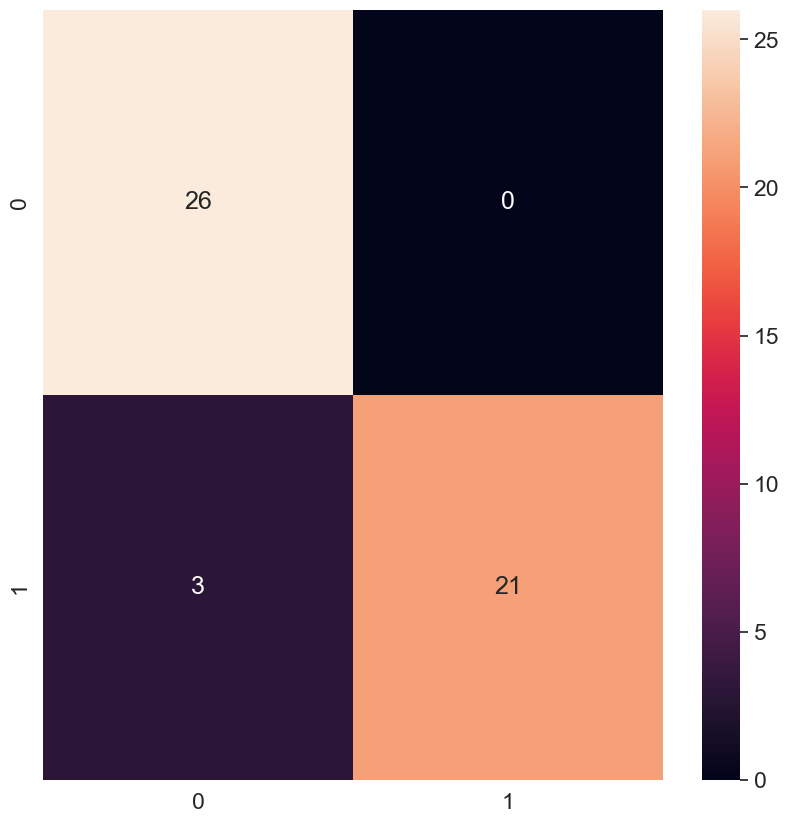

In [136]:
y_prediction = model.predict(X_test)
y_prediction_classes = np.argmax(y_prediction, axis = 1)
y_true = np.argmax(Y_test, axis = 1)
conf_matrix = confusion_matrix(y_true, y_prediction_classes)
df = pd.DataFrame(conf_matrix, range(2), range(2))
plt.figure(figsize = (10, 10))
sns.set(font_scale = 1.5)
sns.heatmap(df, annot = True)
plt.show()